# Graham Scan Algorithm for Finding the Convex Hull

## Introduction

The **convex hull** of a set of points in the plane is the smallest convex polygon that contains all the points. It can be visualized as the shape formed by a rubber band stretched around the outermost points.

The **Graham Scan** algorithm is an efficient method to compute the convex hull for a set of 2D points. It operates in $ O(n \log n) $ time complexity, where $ n $ is the number of input points.


## Algorithm Overview

### Steps of the Graham Scan Algorithm

1. **Find the Pivot Point**:
   - Select the point with the lowest y-coordinate. If there's a tie, choose the one with the lowest x-coordinate.
   - This point is the **pivot** and will be the starting point of the convex hull.

2. **Sort the Points by Polar Angle**:
   - Calculate the angle each point makes with the pivot relative to the horizontal axis.
   - Sort the points in increasing order of these angles (counterclockwise order).

3. **Initialize the Stack**:
   - Start with an empty stack.
   - Push the first three sorted points onto the stack. These form the initial convex hull.

4. **Process Remaining Points**:
   - For each remaining point $ p_i $ in the sorted list:
     - While the sequence formed by the last two points in the stack and $ p_i $ does not make a **left turn** (i.e., it's a right turn or colinear), **pop** the last point from the stack.
     - Push $ p_i $ onto the stack.
   - This step ensures that all non-convex points are removed, and the remaining points form the convex hull.

5. **Output the Convex Hull**:
   - The points in the stack at the end of the algorithm represent the vertices of the convex hull in counterclockwise order.


## Detailed Explanation

### 1. Finding the Pivot Point

The pivot point $ P_0 $ is crucial because all angles are measured relative to it.

- **Pivot $ P_0 $**: Point with the lowest y-coordinate (and lowest x-coordinate if there's a tie).

### 2. Sorting by Polar Angle

For each point $ P_i $, calculate the polar angle $ \theta_i $ with respect to $ P_0 $:

$$
\theta_i = \arctan\left( \frac{P_i.y - P_0.y}{P_i.x - P_0.x} \right)
$$

Sort the points based on $ \theta_i $. If two points have the same angle, keep the one that is closer to $ P_0 $.

### 3. Initializing the Stack

Push the first three points onto the stack:
### 4. Processing Remaining Points

For each point $ P_i $ from $ P_3 $ to $ P_n $:

- **Orientation Test**:
  - Determine the turn direction using the **cross product** of vectors.
  - For three points $ A $, $ B $, $ C $:
    - Compute:

      $$
      (B.x - A.x) \times (C.y - A.y) - (B.y - A.y) \times (C.x - A.x)
      $$

    - If the result is:
      - **Positive**: Counterclockwise turn (left turn).
      - **Negative**: Clockwise turn (right turn).
      - **Zero**: Points are colinear.

- **While the turn is not a left turn**:
  - Pop the last point from the stack.

- **Push the current point** $ P_i $ onto the stack.

### 5. Final Convex Hull

The points remaining in the stack after processing all points form the convex hull.


## Pseudocode

```plaintext
function GRAHAM_SCAN(points):
    # Step 1: Find the pivot point
    P0 = point with the lowest y-coordinate (and lowest x-coordinate if tie)

    # Step 2: Sort points by polar angle with P0
    sort points[1..n] by angle from P0

    # Step 3: Initialize the stack
    stack = empty stack
    push P0 onto stack
    push points[1] onto stack
    push points[2] onto stack

    # Step 4: Process remaining points
    for i from 3 to n:
        while orientation(next_to_top(stack), top(stack), points[i]) <= 0:
            pop stack
        push points[i] onto stack

    return stack

function ORIENTATION(A, B, C):
    # Cross product to determine the orientation
    return (B.x - A.x) * (C.y - A.y) - (B.y - A.y) * (C.x - A.x)

In [86]:
import math
import matplotlib.pyplot as plt

class Polygon:
    def __init__(self, points=None):
        self.points = points if points else []

        self.hull = self.get_convex_hull()

    def add_point(self, point):
        self.points.append(point)
        self.hull = self.get_convex_hull()

    def remove_point(self, point):
        if point in self.points:
            self.points.remove(point)
            self.hull = self.get_convex_hull()

    def get_convex_hull(self):
        # Compute the convex hull using Graham's scan
        def orientation(p, q, r):
            return (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

        points = sorted(set(self.points))  # Remove duplicates and sort
        if len(points) <= 1:
            return points

        lower = []
        for p in points:
            while len(lower) >= 2 and orientation(lower[-2], lower[-1], p) <= 0:
                lower.pop()
            lower.append(p)

        upper = []
        for p in reversed(points):
            while len(upper) >= 2 and orientation(upper[-2], upper[-1], p) <= 0:
                upper.pop()
            upper.append(p)

        return lower[:-1] + upper[:-1]

    def plot_points_and_hull(self):
        plt.figure(figsize=(8, 6))

        # Plot all points
        x, y = zip(*self.points) if self.points else ([], [])
        plt.scatter(x, y, label="Points", color="blue", zorder=2)

        # Plot the convex hull
        if self.hull:
            hull_x, hull_y = zip(*(self.hull + [self.hull[0]]))  # Close the hull loop
            plt.plot(hull_x, hull_y, label="Convex Hull", color="red", zorder=1)

        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.title("Convex Hull and Points")
        plt.legend()
        plt.grid(True)
        plt.show()

    def get_intersection_points(self, segment_start, segment_end):
        """Returns a list of intersection points between the line segment and the polygon edges."""
        if not self.hull or len(self.hull) < 3:
            return []  # Not a valid polygon

        def line_intersection(p1, p2, p3, p4):
            """Calculates the intersection point between two line segments if it exists."""
            x1, y1 = p1
            x2, y2 = p2
            x3, y3 = p3
            x4, y4 = p4

            denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
            if denominator == 0:
                return None  # Lines are parallel or coincident

            px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denominator
            py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denominator

            # Check if the intersection point lies on both segments
            if (min(x1, x2) <= px <= max(x1, x2) and
                min(y1, y2) <= py <= max(y1, y2) and
                min(x3, x4) <= px <= max(x3, x4) and
                min(y3, y4) <= py <= max(y3, y4)):
                return (px, py)
            else:
                return None

        intersection_points = []
        n = len(self.hull)
        for i in range(n):
            p1 = self.hull[i]
            p2 = self.hull[(i + 1) % n]

            intersect_point = line_intersection(p1, p2, segment_start, segment_end)
            if intersect_point is not None:
                intersection_points.append(intersect_point)

        return intersection_points
    
    def intersects_polygon(self, segment_start, segment_end):
        intersection_points = list(set(self.get_intersection_points(segment_start, segment_end)))
        if len(intersection_points) <= 1:
            return False
        if len(intersection_points) == 2:
            if self.no_edge_contains_both_points(intersection_points[0], intersection_points[1]):
                return True
            else:
                return False
        else:
            return True

    def no_edge_contains_both_points(self, point1, point2):
        """
        Returns True if there is no edge in the polygon that contains both point1 and point2.
        Returns False if both points lie on the same edge of the polygon.
        """
        if not self.hull or len(self.hull) < 2:
            return True  # Polygon has no edges to check

        for i in range(len(self.hull)):
            edge_start = self.hull[i]
            edge_end = self.hull[(i + 1) % len(self.hull)]

            # Check if both points lie on the current edge
            if self._point_on_edge(point1, edge_start, edge_end) and self._point_on_edge(point2, edge_start, edge_end):
                return False  # Both points lie on the same edge

        return True  # No edge contains both points

    def _point_on_edge(self, point, edge_start, edge_end):
        """
        Helper method to check if a point lies on a given edge (line segment).
        """
        x, y = point
        x1, y1 = edge_start
        x2, y2 = edge_end

        # Calculate the cross product to check colinearity
        cross = (y - y1) * (x2 - x1) - (x - x1) * (y2 - y1)
        if abs(cross) > 1e-8:
            return False  # Not colinear

        # Check if the point lies between the edge's endpoints
        dot_product = (x - x1) * (x2 - x1) + (y - y1) * (y2 - y1)
        if dot_product < 0:
            return False  # Point is before edge_start

        squared_length = (x2 - x1) ** 2 + (y2 - y1) ** 2
        if dot_product > squared_length:
            return False  # Point is after edge_end

        return True  # Point lies on the edge
    

Line intersects the interior: False
Initial Convex Hull: [(0, 0), (0, 3), (3, 3), (3, 1)]


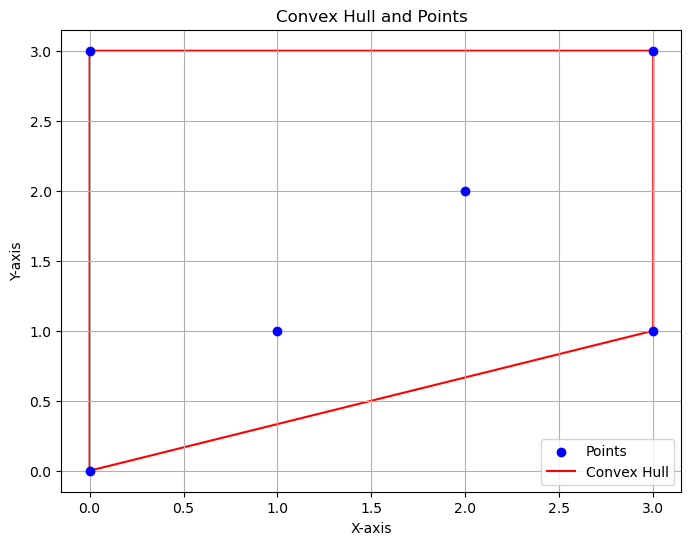

Updated Convex Hull after adding (2, -1): [(0, 0), (0, 3), (3, 3), (3, 1), (2, -1)]


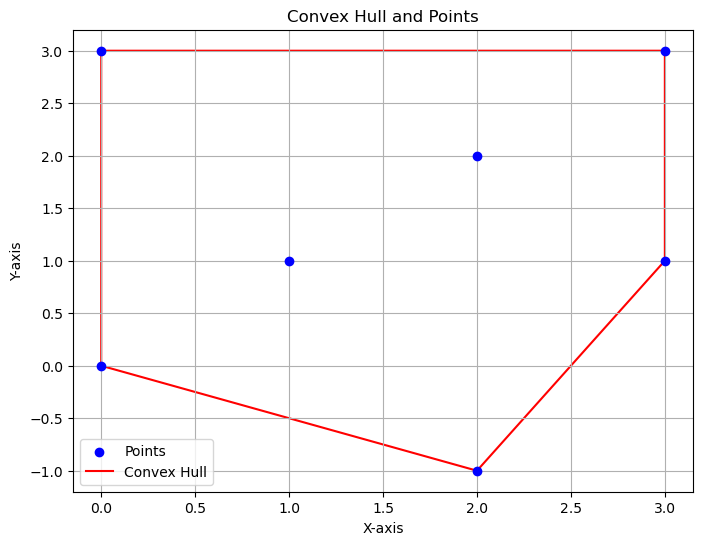

Updated Convex Hull after removing (1, 1): [(0, 0), (0, 3), (3, 3), (3, 1), (2, -1)]


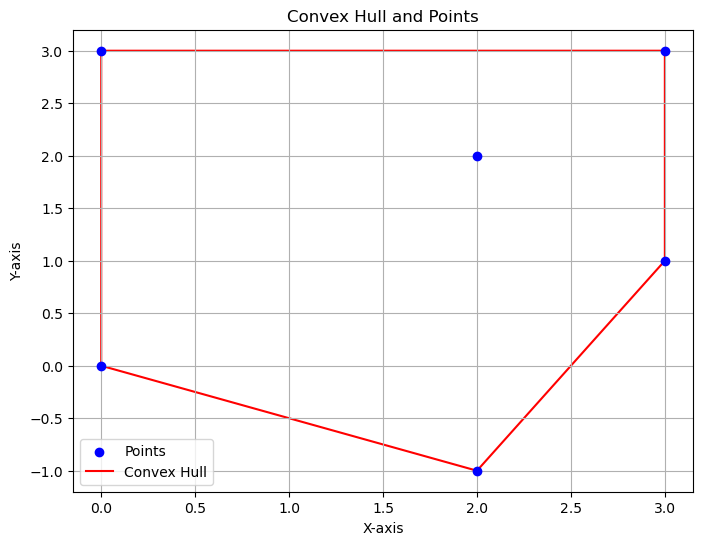

In [ ]:
points = [(0, 0), (1, 1), (2, 2), (3, 1), (0, 3), (3, 3)]
manager = Polygon(points)

# check if the polygon is in=-[itersected by the line through (-1, 2) and (1, 4)
print("Line intersects the interior:", manager.intersects_polygon((3, 1.5), (3, 2.5)))


# Initial plot
print("Initial Convex Hull:", manager.hull)
manager.plot_points_and_hull()


# Adding a new point
manager.add_point((2, -1))
print("Updated Convex Hull after adding (2, -1):", manager.hull)
manager.plot_points_and_hull()

# Removing a point
manager.remove_point((1, 1))
print("Updated Convex Hull after removing (1, 1):", manager.hull)
manager.plot_points_and_hull()